In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from preprocessing import image_processing
from process_data_3d_generator import ProcessData




Using TensorFlow backend.


In [53]:
df = pd.read_csv('logs4/training.log')

In [ ]:
df.columns

In [ ]:
val_acc = df.val_acc.values
val_loss = df.val_loss.values
acc = df.acc.values
loss =df.loss.values

In [ ]:
sorted_acc = np.argsort(val_acc)

In [ ]:
plt.plot(val_acc, label='Validation')
plt.plot(acc, label='Training')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('CNN-LSTM Model')
plt.legend()
plt.show()

In [ ]:
plt.plot(val_loss, label='Validation')
plt.plot(loss, label='Training')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('CNN-LSTM Model')
plt.legend()
plt.show()

In [ ]:
df_3d = pd.read_csv('logs5/training.log')

In [ ]:
df_3d.head()

In [ ]:
val_acc3d = df_3d.val_acc.values
val_loss3d = df_3d.val_loss.values
acc_3d = df_3d.acc.values
loss_3d =df_3d.loss.values

In [ ]:
plt.plot(val_acc3d, label='Validation')
plt.plot(acc_3d, label='Training')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('3D_cnn Model')
plt.legend()
plt.show()

In [ ]:
plt.plot(val_loss3d, label='Validation')
plt.plot(loss_3d, label='Training')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('3D_cnn Model')
plt.legend()
plt.show()

In [ ]:
df_cd3 = pd.read_csv('logs6/training.log')
val_acc_cd3 = df_cd3.val_acc.values
val_loss_cd3 = df_cd3.val_loss.values
acc_cd3 = df_cd3.acc.values
loss_cd3 =df_cd3.loss.values

In [ ]:
plt.plot(val_loss_cd3, label='Validation')
plt.plot(loss_cd3, label='Training')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('CD3 Model')
plt.legend()
plt.show()

In [ ]:
plt.plot(val_acc_cd3, label='Validation')
plt.plot(acc_cd3, label='Training')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('CD3 Model')
plt.legend()
plt.show()

In [ ]:
df_cnlstm_avg = pd.read_csv('logs7/training.log')

In [ ]:
val_acc_avg= df_cnlstm_avg.val_acc.values
val_loss_avg = df_cnlstm_avg.val_loss.values
acc_avg = df_cnlstm_avg.acc.values
loss_avg =df_cnlstm_avg.loss.values

In [51]:
plt.plot(val_loss_avg, label='Validation')
plt.plot(loss_avg, label='Training')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('CNN-LSTM with subtracted mean')
plt.legend()
plt.show()

NameError: name 'val_loss_avg' is not defined

In [52]:
plt.plot(val_acc_avg, label='Validation')
plt.plot(acc_avg, label='Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CNN-LSTM with subtracted mean')
plt.legend()
plt.show()

NameError: name 'val_acc_avg' is not defined

In [ ]:
#img size (227,227)
df_model0 = pd.read_csv('log10/training.log')
val_acc_10= df_model0.val_acc.values
val_loss_10 = df_model0.val_loss.values
acc_10 = df_model0.acc.values
loss_10 =df_model0.loss.values

In [ ]:
plt.plot(val_acc_10, label='Validation')
plt.plot(acc_10, label='Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CNN-LSTM with subtracted mean')
plt.legend()
plt.show()

In [ ]:
plt.plot(val_loss_10, label='Validation')
plt.plot(loss_10, label='Training')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('CNN-LSTM with subtracted mean')
plt.legend()
plt.show()

In [43]:
df_3d_3class = pd.read_csv('logs12/training.log')
val_acc_3d3= df_3d_3class.val_acc.values
val_loss_3d3 = df_3d_3class.val_loss.values
acc_3d3 = df_3d_3class.acc.values
loss_3d3 =df_3d_3class.loss.values

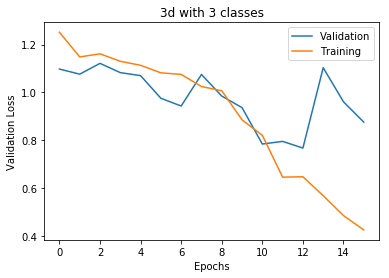

In [44]:
plt.plot(val_loss_3d3, label='Validation')
plt.plot(loss_3d3, label='Training')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('3d with 3 classes')
plt.legend()
plt.show()

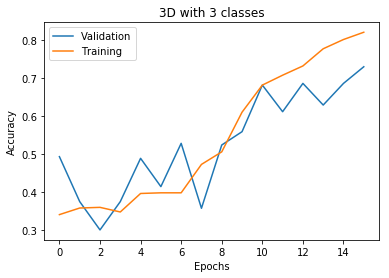

In [45]:
plt.plot(val_acc_3d3, label='Validation')
plt.plot(acc_3d3, label='Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('3D with 3 classes')
plt.legend()
plt.show()

In [2]:
from keras.models import load_model
from keras import backend as K
from skimage.transform import resize

model = load_model('log10/checkpoing.hdf5')

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_1 (TimeDist (None, 25, 114, 114, 32)  832       
_________________________________________________________________
time_distributed_2 (TimeDist (None, 25, 112, 112, 32)  9248      
_________________________________________________________________
time_distributed_3 (TimeDist (None, 25, 56, 56, 32)    0         
_________________________________________________________________
time_distributed_4 (TimeDist (None, 25, 56, 56, 64)    18496     
_________________________________________________________________
time_distributed_5 (TimeDist (None, 25, 56, 56, 64)    36928     
_________________________________________________________________
time_distributed_6 (TimeDist (None, 25, 28, 28, 64)    0         
_________________________________________________________________
time_distributed_7 (TimeDist (None, 25, 28, 28, 128)   73856     
__________

In [4]:
model.layers[14].input
K.learning_phase()
layer = model.layers[0]
activations_f = K.function([model.layers[0].input, K.learning_phase()], [layer.output,])
activations_f.outputs

[<tf.Tensor 'time_distributed_1/Reshape_1:0' shape=(?, 25, 114, 114, 32) dtype=float32>]

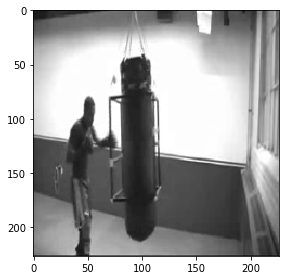

In [5]:
img = io.imread('train/punching/seq_5/punching_5-009.png', as_grey=True)
img = resize(img, (227,227), mode='constant')
io.imshow(img)
plt.show()

In [6]:
img = np.expand_dims(img, axis=0)
img = np.expand_dims(img, axis=3)
img.shape

(1, 227, 227, 1)

In [7]:
test = ProcessData()
X_test, y_test = test.generate_images_in_memory('test', avg=True)

In [8]:
y_true = []
for row in y_test:
    y_true.append(row.argmax())
y_true = np.array(y_true)

In [9]:
y_pred = model.predict(X_test)

In [24]:
y_pre = []
for row in y_pred:
    y_pre.append(row.argmax())
y_pre = np.array(y_pre)

In [34]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(y_pred)
colors_map = np.argmax(y_test, axis=1)


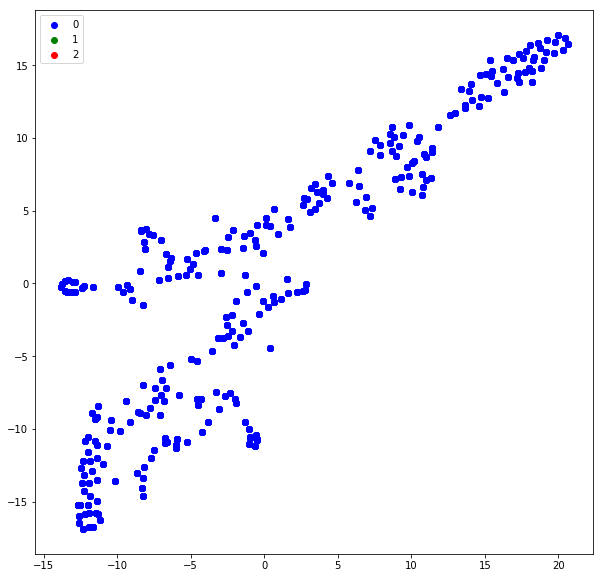

In [18]:
colors = np.array([x for x in 'b-g-r'.split('-')])
colors_map = colors_map[:1000]
plt.figure(figsize=(10,10))
for cl in range(3):
    indices = np.where(colors_map==cl)
    plt.scatter(X_tsne[indices,0], X_tsne[indices, 1], c=colors[cl], label=cl)
plt.legend()
plt.show()

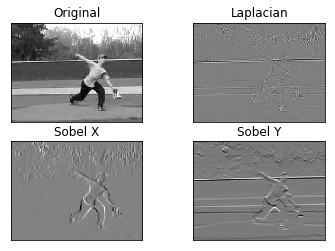

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('train/throwing/seq_11/throwing_11-035.png',0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

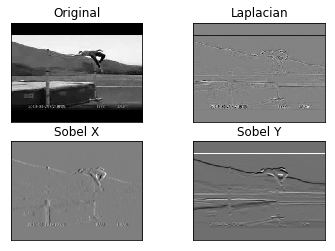

In [50]:
img = cv2.imread('train/jumping/seq_3/jumping_3-088.png',0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

In [ ]:
import cv2
cap = cv2.VideoCapture('test/jumping/v_HighJump_g03_c02.avi')



fgbg = cv2.createBackgroundSubtractorMOG2()
while(1):
    ret, frame = cap.read()
    fgmask = fgbg.apply(frame)
    cv2.imshow('frame',fgmask)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
cap.release()
cv2.destroyAllWindows()